---

## Cell 0: Setup Virtual Environment (Local Environment Only)

### What
We're creating a dedicated virtual environment for this project to isolate dependencies and ensure reproducibility.

### Why
Using a virtual environment is a best practice because:
- Isolates project dependencies from system Python
- Prevents version conflicts with other projects
- Makes the project portable and reproducible
- Allows specific package versions without affecting other projects

### Technical Details
**For Local Development**:
1. Create a virtual environment using Python 3.9+
2. Activate the virtual environment
3. Install PyCaret with specific compatible versions

**For Google Colab**: Skip this cell (Colab manages its own environment)

### Instructions

**Option 1: Using venv (recommended)**
```bash
# Navigate to your project directory
cd /Users/banbalagan/Projects/pycaret-automl-examples

# Create virtual environment
python3.9 -m venv venv

# Activate virtual environment
# On macOS/Linux:
source venv/bin/activate
# On Windows:
# venv\Scripts\activate

# Verify Python version
python --version

# Continue to next cell for package installation
```

**Option 2: Using conda**
```bash
# Create conda environment
conda create -n pycaret-env python=3.9 -y

# Activate environment
conda activate pycaret-env
```

### Expected Output
After activation, your terminal prompt should show `(venv)` or `(pycaret-env)` prefix, indicating the virtual environment is active.

### Important Notes
- Run this in your terminal BEFORE opening Jupyter Notebook
- After creating/activating the virtual environment, install Jupyter in it:
  ```bash
  pip install jupyter notebook
  ```
- Then launch Jupyter from within the activated environment:
  ```bash
  jupyter notebook
  ```
- Select the kernel that corresponds to your virtual environment in Jupyter

---

## Cell 1: Install and Import Required Libraries

### What
We're installing PyCaret with compatible dependencies and importing all necessary Python libraries for our analysis.

### Why
Google Colab comes with pre-installed packages that can conflict with PyCaret's dependencies. For local environments, we install specific package versions to ensure stability and reproducibility.

### Technical Details
- **Google Colab**: Install compatible versions to avoid runtime crashes
- **Local Environment**: Install PyCaret with specific versions (Option 2 - recommended)
- Import all necessary libraries for data analysis and machine learning

### Expected Output
- **Google Colab**: Installation messages and a reminder to restart the runtime
- **Local Environment**: Clean installation of all required packages

### IMPORTANT (Google Colab Users)
⚠️ After running this cell in Colab, you MUST restart the runtime:
- Click: **Runtime → Restart runtime** (or Ctrl+M .)
- After restart, skip this cell and run all other cells normally

In [ ]:
# ============================================================
# INSTALLATION CELL - Environment Detection & Package Setup
# ============================================================

import sys
import os

# Check if running in Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("=" * 60)
    print("🔧 Google Colab Detected")
    print("=" * 60)
    print("📦 Installing PyCaret with compatible dependencies...")
    print("⏳ This will take 2-3 minutes, please be patient...")

    # Upgrade pip first
    !pip install -q --upgrade pip

    # Install compatible base packages FIRST (prevents conflicts)
    print("Step 1/3: Installing base packages with compatible versions...")
    !pip install -q --upgrade \
        numpy>=1.23.0,<2.0.0 \
        pandas>=2.0.0,<2.3.0 \
        scipy>=1.10.0,<1.14.0 \
        scikit-learn>=1.3.0,<1.6.0 \
        matplotlib>=3.7.0,<3.9.0

    # Install PyCaret (will use already installed base packages)
    print("Step 2/3: Installing PyCaret...")
    !pip install -q pycaret

    # Install additional ML packages
    print("Step 3/3: Installing additional ML packages...")
    !pip install -q \
        category-encoders \
        lightgbm \
        xgboost \
        catboost \
        optuna \
        plotly \
        kaleido

    print("\n" + "=" * 60)
    print("✅ Installation Complete!")
    print("=" * 60)
    print("⚠️  CRITICAL: You MUST restart the runtime now!")
    print("   👉 Click: Runtime → Restart runtime (or Ctrl+M .)")
    print("🔄 After restart:")
    print("   1. Skip this installation cell")
    print("   2. Run all other cells normally")
    print("   3. Everything will work without crashes!")
    print("=" * 60)

else:
    print("=" * 60)
    print("📍 Local Environment Detected")
    print("=" * 60)
    print("Installing PyCaret with specific compatible versions...")
    print("Using Option 2: Controlled dependency installation\n")
    
    # Upgrade pip first
    !pip install -q --upgrade pip
    
    # Install base packages with specific versions (Option 2)
    print("Step 1/4: Installing base packages...")
    !pip install -q \
        numpy>=1.23.0,<2.0.0 \
        pandas>=2.0.0,<2.3.0 \
        scipy>=1.10.0,<1.14.0 \
        scikit-learn>=1.3.0,<1.6.0 \
        matplotlib>=3.7.0,<3.9.0 \
        seaborn>=0.12.0
    
    # Install PyCaret
    print("Step 2/4: Installing PyCaret...")
    !pip install -q pycaret
    
    # Install additional ML packages
    print("Step 3/4: Installing additional ML libraries...")
    !pip install -q \
        category-encoders \
        lightgbm \
        xgboost \
        catboost \
        optuna \
        plotly \
        kaleido
    
    # Install notebook support packages
    print("Step 4/4: Installing notebook support packages...")
    !pip install -q ipywidgets
    
    print("\n" + "=" * 60)
    print("✅ Installation Complete!")
    print("=" * 60)
    print("All packages installed successfully in your virtual environment.")
    print("You can now proceed with running the rest of the notebook.")
    print("=" * 60)

# Import libraries after installation
print("\n📚 Importing libraries...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("\n✓ Libraries imported successfully!")
print(f"   - Python version: {sys.version.split()[0]}")
print(f"   - Pandas version: {pd.__version__}")
print(f"   - NumPy version: {np.__version__}")
print(f"   - Working directory: {os.getcwd()}")

# Check if running in virtual environment
if hasattr(sys, 'real_prefix') or (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix):
    print(f"   - Virtual environment: Active ✓")
    print(f"   - Environment path: {sys.prefix}")
else:
    print("   - Virtual environment: Not detected (consider using venv)")
    
print("\n" + "=" * 60)

---

## Cell 2: Load Wholesale Customers Dataset

### What
Loading the wholesale customers dataset with annual spending patterns.

### Why
This dataset is perfect for clustering:
- **Continuous features**: Spending amounts
- **Natural groupings**: Different customer types exist
- **Business relevance**: Real-world segmentation problem
- **No labels**: Truly unsupervised

### Technical Details
- **Local Environment**: Loads from the project's datasets folder
- **Google Colab**: Loads from a public URL
- Features represent annual spending in monetary units across 6 product categories

### Dataset Locations
- **Local Path**: `/Users/banbalagan/Projects/pycaret-automl-examples/datasets/clustering/Wholesale customers data.csv`
- **Remote URL**: For Colab users or if local file is not available

### Expected Output
Dataset with 440 customers and 8 columns.

In [1]:
import sys
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Check if running in Colab
IN_COLAB = 'google.colab' in sys.modules

# Define dataset paths
LOCAL_PATH = '/Users/banbalagan/Projects/pycaret-automl-examples/datasets/clustering/Wholesale customers data.csv'
# REMOTE_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'  # Commented out - errors

# Try to load from local path first (for local development)
if not IN_COLAB and os.path.exists(LOCAL_PATH):
    print("=" * 60)
    print("📂 Loading dataset from local path...")
    print("=" * 60)
    print(f"Path: {LOCAL_PATH}\n")
    df = pd.read_csv(LOCAL_PATH)
    print(f"✓ Dataset loaded successfully from local file!")
    
elif not IN_COLAB:
    # Local environment but file doesn't exist - check relative path
    print("=" * 60)
    print("⚠️  Local path not found, trying relative path...")
    print("=" * 60)
    
    # Try relative path from notebook location
    relative_paths = [
        '../datasets/clustering/Wholesale customers data.csv',
        '../../datasets/clustering/Wholesale customers data.csv',
        'Wholesale customers data.csv'
    ]
    
    dataset_loaded = False
    for rel_path in relative_paths:
        if os.path.exists(rel_path):
            print(f"✓ Found dataset at: {rel_path}\n")
            df = pd.read_csv(rel_path)
            dataset_loaded = True
            print(f"✓ Dataset loaded successfully from relative path!")
            break
    
    # For local environment: if dataset not found, raise clear error instead of falling back to URL
    if not dataset_loaded:
        print("❌ ERROR: Could not find local dataset file.")
        print(f"Expected location: {LOCAL_PATH}")
        print("\nPlease ensure the dataset file exists at the correct location.")
        raise FileNotFoundError(f"Dataset not found at {LOCAL_PATH}")
        
        # # COMMENTED OUT - Remote URL fallback (causes errors)
        # print("\nFalling back to remote URL...\n")
        # df = pd.read_csv(REMOTE_URL)
        # print(f"✓ Dataset loaded successfully from remote URL!")
        
else:
    # Google Colab - use remote URL
    print("=" * 60)
    print("☁️  Google Colab - Loading from remote URL...")
    print("=" * 60)
    REMOTE_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
    print(f"URL: {REMOTE_URL}\n")
    df = pd.read_csv(REMOTE_URL)
    print(f"✓ Dataset loaded successfully from remote URL!")

# Display basic information
print("\n" + "=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"Shape: {df.shape[0]} customers, {df.shape[1]} features")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n" + "=" * 60)
print("COLUMN NAMES")
print("=" * 60)
print(f"Features: {list(df.columns)}")

print("\n" + "=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
df.head()

📂 Loading dataset from local path...
Path: /Users/banbalagan/Projects/pycaret-automl-examples/datasets/clustering/Wholesale customers data.csv

✓ Dataset loaded successfully from local file!

DATASET INFORMATION
Shape: 440 customers, 8 features
Memory usage: 27.62 KB

COLUMN NAMES
Features: ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

FIRST 5 ROWS


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


---

## Cell 3: Data Exploration

### What
Exploring the structure and statistics of customer spending data.

### Why
Understanding the data helps:
- Identify spending patterns
- Check for outliers (very important in clustering!)
- Understand feature scales
- Determine if normalization needed

### Technical Details
Spending features have very different scales - some in thousands, others in hundreds. Normalization will be critical!

### Expected Output
Summary statistics showing wide range of spending patterns.

In [2]:
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
display(df.describe())

print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
print(df.isnull().sum())

print("\n" + "=" * 60)
print("KEY OBSERVATIONS")
print("=" * 60)
print("- Features have very different scales (100s to 10,000s)")
print("- Large standard deviations indicate diverse customer base")
print("- Some customers spend heavily in certain categories")
print("- Normalization will be essential for clustering")

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB

STATISTICAL SUMMARY


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000



MISSING VALUES
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

KEY OBSERVATIONS
- Features have very different scales (100s to 10,000s)
- Large standard deviations indicate diverse customer base
- Some customers spend heavily in certain categories
- Normalization will be essential for clustering


---

## Cell 4: Spending Distribution Analysis

### What
Visualizing spending distributions across the 6 product categories.

### Why
Understanding distributions helps:
- Identify high-spending vs low-spending customers
- See which categories vary most
- Spot outliers (customers with extreme spending)
- Guide clustering approach

### Technical Details
We'll create box plots for each spending category to see:
- Median spending
- Spread (IQR)
- Outliers

### Expected Output
Box plots showing spending distribution for each category.

SPENDING DISTRIBUTION ACROSS CATEGORIES


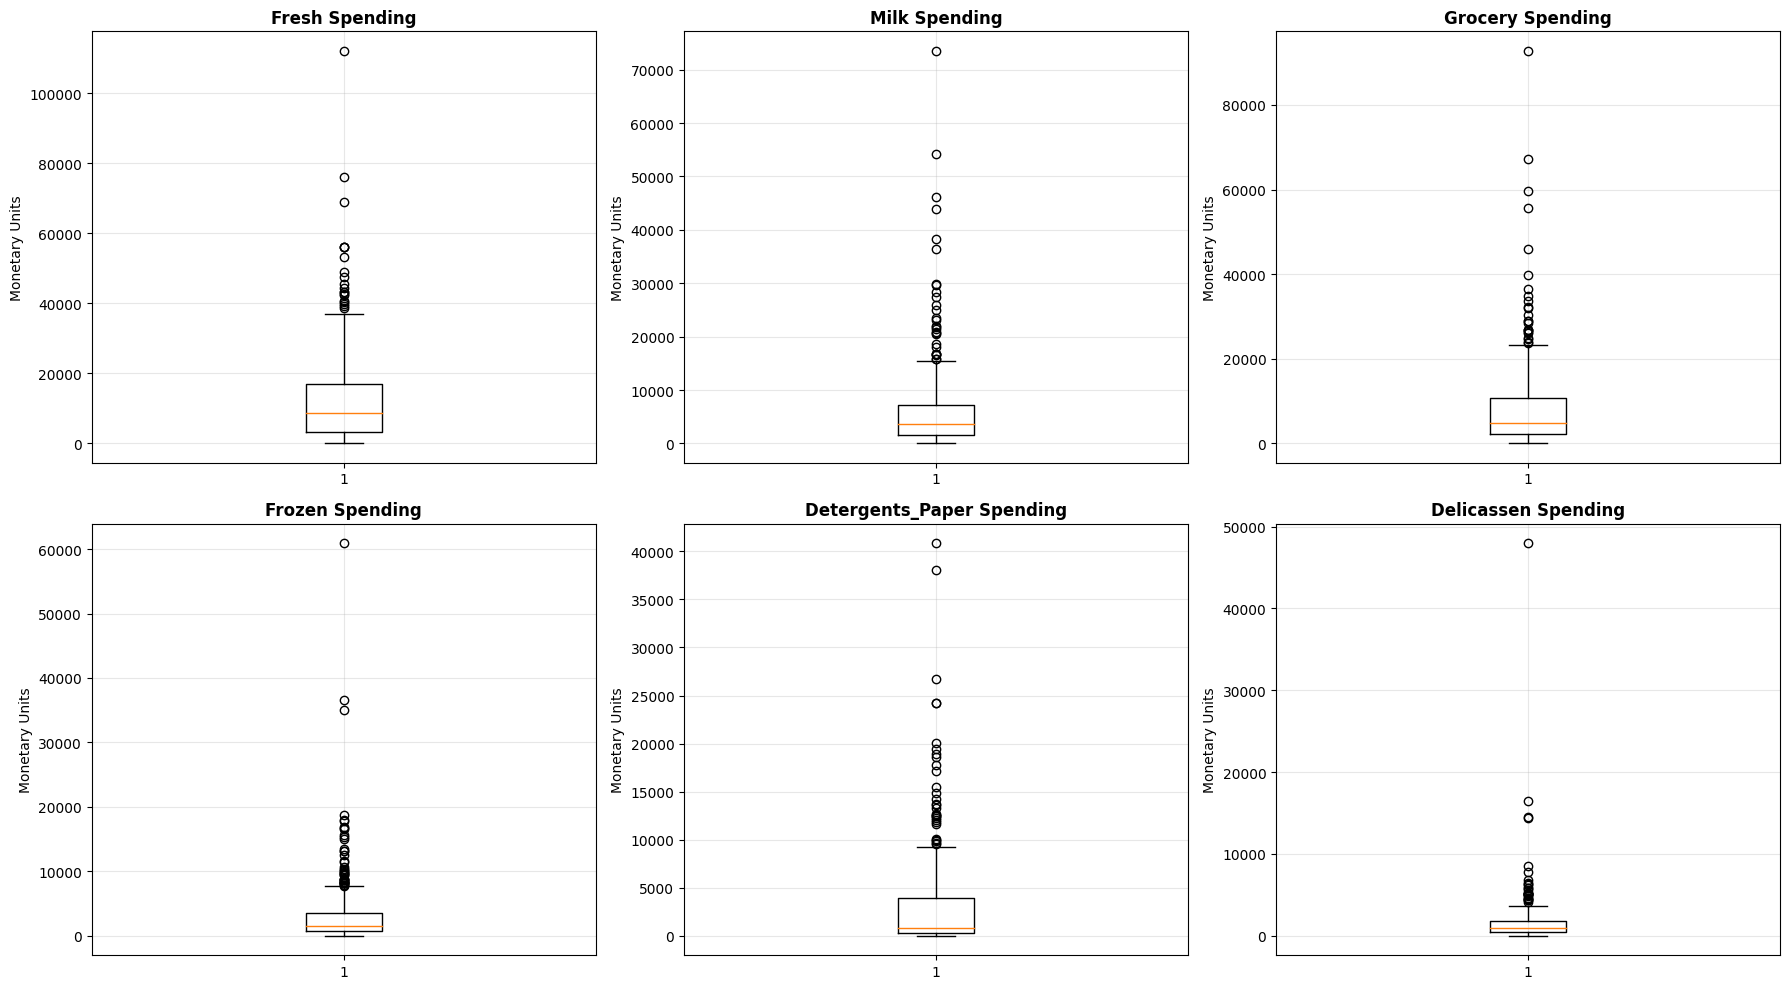


Key Observations:
- Fresh and Grocery show highest spending and variation
- Many outliers (high-spending customers) in each category
- Different customers focus on different product categories
- This diversity suggests natural customer segments exist!


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("=" * 60)
print("SPENDING DISTRIBUTION ACROSS CATEGORIES")
print("=" * 60)

# Select spending columns
spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(spending_cols):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(f'{col} Spending', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Monetary Units', fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- Fresh and Grocery show highest spending and variation")
print("- Many outliers (high-spending customers) in each category")
print("- Different customers focus on different product categories")
print("- This diversity suggests natural customer segments exist!")

---

## Cell 5: Correlation Analysis

### What
Analyzing correlations between different spending categories.

### Why
Correlation reveals:
- Which products are bought together
- Customer purchasing patterns
- Potential customer types (e.g., grocery-focused vs fresh-focused)

### Technical Details
High correlation between categories suggests customers who buy one product category also buy another.

### Expected Output
Heatmap showing correlations between spending categories.

CORRELATION BETWEEN SPENDING CATEGORIES


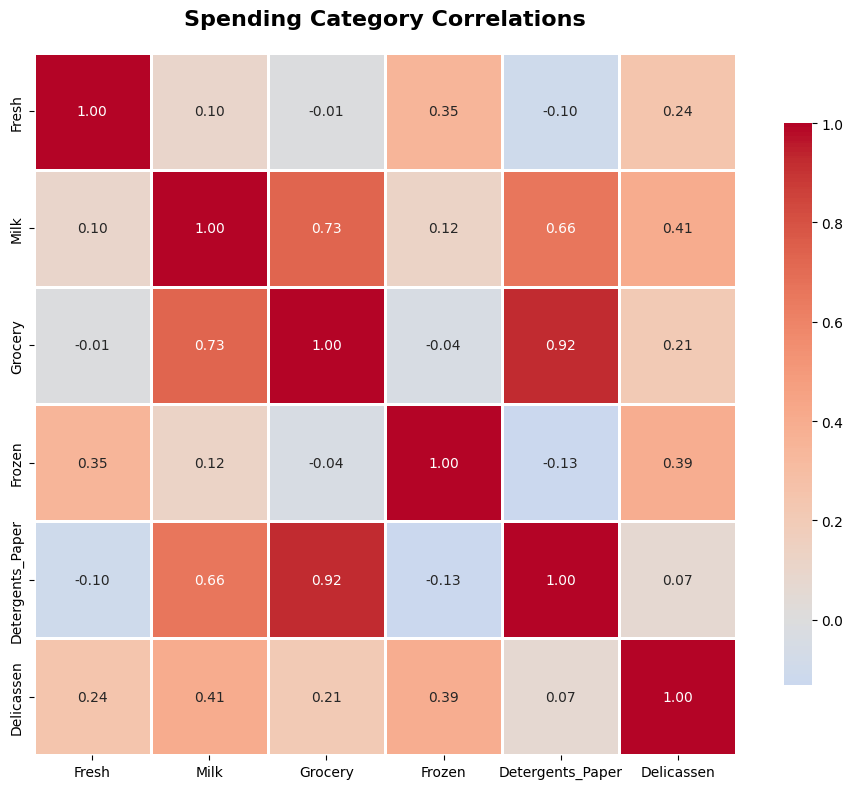


Interpretation:
- High positive correlation: Products bought together
- Example: Grocery, Milk, Detergents_Paper often correlated
  (suggests retail customers buying household essentials)
- Fresh spending sometimes independent
  (suggests restaurant/cafe customers)


In [5]:
print("=" * 60)
print("CORRELATION BETWEEN SPENDING CATEGORIES")
print("=" * 60)

# Calculate correlation
corr_matrix = df[spending_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Spending Category Correlations', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- High positive correlation: Products bought together")
print("- Example: Grocery, Milk, Detergents_Paper often correlated")
print("  (suggests retail customers buying household essentials)")
print("- Fresh spending sometimes independent")
print("  (suggests restaurant/cafe customers)")

---

## Cell 6: PyCaret Setup for Clustering

### What
Initializing PyCaret's clustering environment for unsupervised learning.

### Why
Clustering setup is unique:
- **No target variable** (unsupervised!)
- **Normalization critical**: Features must be on same scale
- **Different preprocessing**: No train/test split (use all data)

### Technical Details
PyCaret will:
- Normalize all features (essential for distance-based clustering)
- Handle any transformations
- Prepare data for multiple clustering algorithms

**Key Difference from Supervised Learning**:
- No train/test split
- No cross-validation
- Evaluation uses internal metrics (silhouette, Davies-Bouldin, etc.)

### Expected Output
Setup summary confirming clustering configuration.

In [6]:
from pycaret.clustering import *

print("=" * 60)
print("PYCARET SETUP - CLUSTERING (UNSUPERVISED)")
print("=" * 60)
print("\nConfiguring unsupervised learning environment...\n")

# Initialize clustering setup
# Changed from session_seed to session_id for PyCaret 3.x
cluster_setup = setup(
    data=df,
    normalize=True,  # CRITICAL for clustering!
    session_id=42,
    verbose=True
)

print("\n" + "=" * 60)
print("✓ Clustering setup completed!")
print("=" * 60)
print("\nKey Differences from Supervised Learning:")
print("- NO target variable (unsupervised)")
print("- NO train/test split (use all 440 customers)")
print("- Evaluation uses internal metrics (silhouette, etc.)")
print("\nReady to discover customer segments!")

PYCARET SETUP - CLUSTERING (UNSUPERVISED)

Configuring unsupervised learning environment...



,Description,Value
0,Session id,42
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore



✓ Clustering setup completed!

Key Differences from Supervised Learning:
- NO target variable (unsupervised)
- NO train/test split (use all 440 customers)
- Evaluation uses internal metrics (silhouette, etc.)

Ready to discover customer segments!


---

## Cell 7: Create and Compare Different Clustering Models

### What
Creating multiple clustering models with different algorithms and cluster numbers.

### Why
Different clustering algorithms have different strengths:
- **KMeans**: Fast, works well with spherical clusters
- **Hierarchical**: No need to specify K upfront, creates dendrogram
- **DBSCAN**: Finds arbitrary shapes, identifies outliers
- **Gaussian Mixture**: Probabilistic clustering

### Technical Details
We need to determine:
1. **Which algorithm** works best
2. **How many clusters** (K) are optimal

PyCaret provides metrics to compare:
- **Silhouette Score**: How well separated clusters are (0-1, higher better)
- **Calinski-Harabasz**: Ratio of between/within cluster variance (higher better)
- **Davies-Bouldin**: Average similarity between clusters (lower better)

### Expected Output
Table comparing different clustering models and their quality metrics.

In [7]:
print("=" * 60)
print("COMPARING CLUSTERING ALGORITHMS")
print("=" * 60)
print("\nTesting different algorithms to find best customer segmentation...\n")

# Create KMeans with different K values
print("Testing KMeans with K=3, 4, 5...")
kmeans_3 = create_model('kmeans', num_clusters=3)
kmeans_4 = create_model('kmeans', num_clusters=4)
kmeans_5 = create_model('kmeans', num_clusters=5)

print("\n" + "=" * 60)
print("Clustering Quality Metrics Explained:")
print("=" * 60)
print("\n- Silhouette Score (0-1): How well separated clusters are")
print("  Higher is better. >0.5 is good, >0.7 is excellent")
print("\n- Calinski-Harabasz: Between vs within cluster variance")
print("  Higher is better. Indicates dense, well-separated clusters")
print("\n- Davies-Bouldin: Average similarity between clusters")
print("  Lower is better. Measures cluster separation")

print("\nNote: We'll use Silhouette and Elbow method to choose optimal K")

COMPARING CLUSTERING ALGORITHMS

Testing different algorithms to find best customer segmentation...

Testing KMeans with K=3, 4, 5...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3568,139.3494,1.1736,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3482,130.9179,1.2359,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3570,135.4684,1.1515,0,0,0



Clustering Quality Metrics Explained:

- Silhouette Score (0-1): How well separated clusters are
  Higher is better. >0.5 is good, >0.7 is excellent

- Calinski-Harabasz: Between vs within cluster variance
  Higher is better. Indicates dense, well-separated clusters

- Davies-Bouldin: Average similarity between clusters
  Lower is better. Measures cluster separation

Note: We'll use Silhouette and Elbow method to choose optimal K


---

## Cell 8: Elbow Method for Optimal K

### What
Using the Elbow Method to determine the optimal number of customer segments.

### Why
The Elbow Method helps find optimal K:
- Plots within-cluster sum of squares (WCSS) vs K
- Look for the "elbow" - point where adding clusters provides diminishing returns
- Balance between simplicity (few clusters) and detail (many clusters)

### Technical Details
**WCSS** (Within-Cluster Sum of Squares):
- Measures how compact clusters are
- Always decreases as K increases
- Elbow = point where decrease slows significantly

### Expected Output
Elbow plot showing optimal number of clusters (typically 3-5 for this dataset).

ELBOW METHOD - FINDING OPTIMAL NUMBER OF CLUSTERS


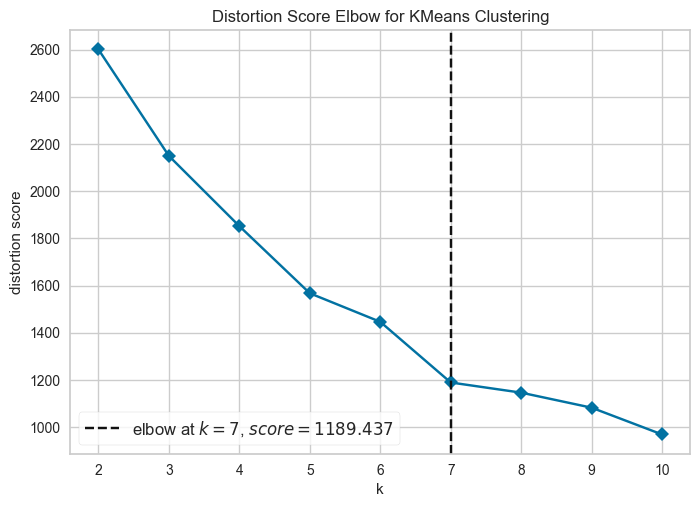


HOW TO READ THE ELBOW PLOT

1. Look for the 'elbow' - point where line starts to flatten
2. This is where adding more clusters gives diminishing returns
3. Balance model complexity with interpretability

For business segmentation: 3-5 clusters typically optimal
- Too few: Lose important distinctions
- Too many: Hard to create targeted strategies


In [8]:
print("=" * 60)
print("ELBOW METHOD - FINDING OPTIMAL NUMBER OF CLUSTERS")
print("=" * 60)

# PyCaret's elbow plot
plot_model(kmeans_4, plot='elbow')

print("\n" + "=" * 60)
print("HOW TO READ THE ELBOW PLOT")
print("=" * 60)
print("\n1. Look for the 'elbow' - point where line starts to flatten")
print("2. This is where adding more clusters gives diminishing returns")
print("3. Balance model complexity with interpretability")
print("\nFor business segmentation: 3-5 clusters typically optimal")
print("- Too few: Lose important distinctions")
print("- Too many: Hard to create targeted strategies")

---

## Cell 9: Silhouette Analysis

### What
Analyzing the Silhouette Score to validate cluster quality.

### Why
Silhouette analysis shows:
- How well each customer fits their cluster
- Whether clusters are well-separated
- If any customers are in the wrong cluster

### Technical Details
**Silhouette Score** for each point measures:
- Distance to own cluster vs distance to nearest other cluster
- Score close to +1: Well clustered
- Score close to 0: On cluster boundary
- Score close to -1: Probably in wrong cluster

### Expected Output
Silhouette plot showing cluster quality.

SILHOUETTE ANALYSIS

Analyzing cluster separation quality...



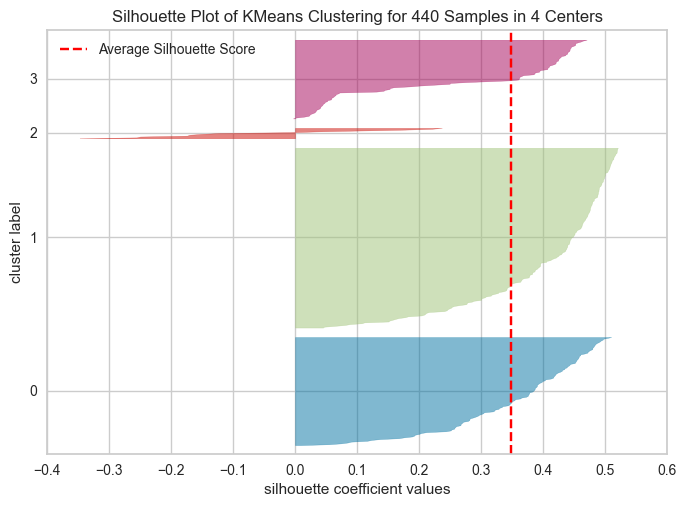


INTERPRETING SILHOUETTE PLOT

- Each horizontal bar represents one cluster
- Width shows how many customers in that cluster
- Thickness at different x-values shows silhouette scores

Ideal characteristics:
- All bars extend well past the average line (red dashed)
- Bars have similar thickness (balanced cluster sizes)
- Few or no bars below 0 (no misclassified customers)


In [9]:
print("=" * 60)
print("SILHOUETTE ANALYSIS")
print("=" * 60)
print("\nAnalyzing cluster separation quality...\n")

# Silhouette plot
plot_model(kmeans_4, plot='silhouette')

print("\n" + "=" * 60)
print("INTERPRETING SILHOUETTE PLOT")
print("=" * 60)
print("\n- Each horizontal bar represents one cluster")
print("- Width shows how many customers in that cluster")
print("- Thickness at different x-values shows silhouette scores")
print("\nIdeal characteristics:")
print("- All bars extend well past the average line (red dashed)")
print("- Bars have similar thickness (balanced cluster sizes)")
print("- Few or no bars below 0 (no misclassified customers)")

---

## Cell 10: Assign Customers to Clusters

### What
Assigning each customer to their optimal cluster and adding cluster labels to our dataset.

### Why
Once we have good clusters, we need to:
- Assign each customer to a cluster
- Analyze what makes each cluster unique
- Create actionable business segments

### Technical Details
`assign_model()` adds a 'Cluster' column showing which segment each customer belongs to.

### Expected Output
Original dataset with added 'Cluster' column showing segment membership.

In [10]:
print("=" * 60)
print("ASSIGNING CUSTOMERS TO SEGMENTS")
print("=" * 60)

# Assign clusters (using 4 clusters based on elbow method)
clustered_df = assign_model(kmeans_4)

print(f"\n✓ All {len(clustered_df)} customers assigned to clusters!")
print("\nCustomers per Cluster:")
print(clustered_df['Cluster'].value_counts().sort_index())

print("\nSample of clustered data:")
display(clustered_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Cluster']].head(10))

print("\n" + "=" * 60)
print("Next: Profile each cluster to understand customer segments!")
print("=" * 60)

ASSIGNING CUSTOMERS TO SEGMENTS

✓ All 440 customers assigned to clusters!

Customers per Cluster:
Cluster
Cluster 0    126
Cluster 1    209
Cluster 2     13
Cluster 3     92
Name: count, dtype: int64

Sample of clustered data:


,Fresh,Milk,Grocery,Frozen,Cluster
0,12669,9656,7561,214,Cluster 0
1,7057,9810,9568,1762,Cluster 0
2,6353,8808,7684,2405,Cluster 0
3,13265,1196,4221,6404,Cluster 1
4,22615,5410,7198,3915,Cluster 0
5,9413,8259,5126,666,Cluster 0
6,12126,3199,6975,480,Cluster 0
7,7579,4956,9426,1669,Cluster 0
8,5963,3648,6192,425,Cluster 1
9,6006,11093,18881,1159,Cluster 0



Next: Profile each cluster to understand customer segments!


---

## Cell 11: Cluster Profiling - Understanding Each Segment

### What
Analyzing the characteristics of each customer segment by examining average spending patterns.

### Why
This is where clustering becomes actionable:
- **What defines each segment?** High grocery vs high fresh spending?
- **Business naming**: "Restaurant Customers", "Retail Stores", etc.
- **Targeted strategies**: Different marketing for each segment

### Technical Details
We'll calculate mean spending per cluster across all 6 product categories.

### Expected Output
Table and visualizations showing average spending profile for each segment.

CLUSTER PROFILING - UNDERSTANDING CUSTOMER SEGMENTS

Average Spending by Cluster:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
Cluster 0,8130.0,8874.0,14139.0,1339.0,6105.0,1543.0
Cluster 1,13298.0,3168.0,3741.0,3437.0,769.0,1263.0
Cluster 2,25771.0,35160.0,41977.0,6845.0,19867.0,7880.0
Cluster 3,12407.0,3402.0,4234.0,4082.0,865.0,1198.0


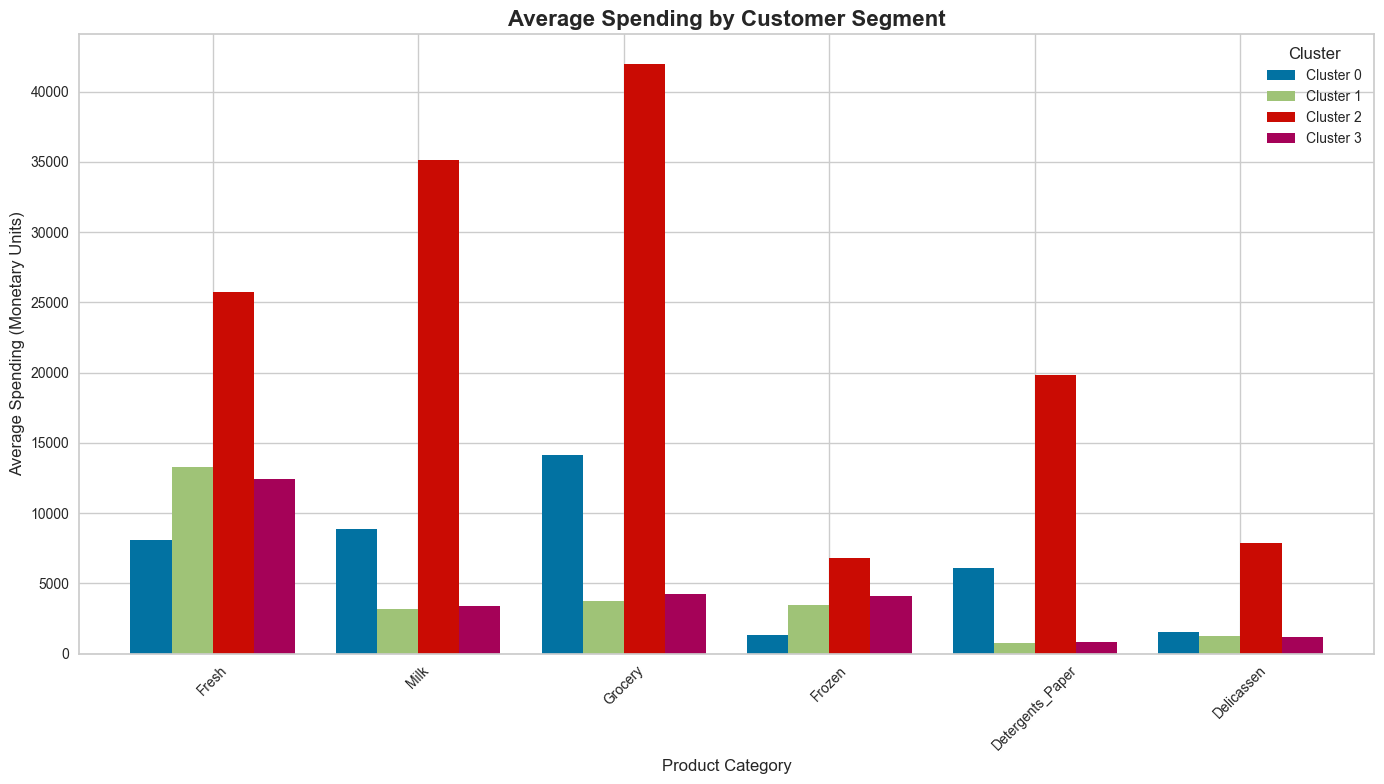


SEGMENT INTERPRETATION (Example)

Cluster Cluster 0: (126 customers)
  Highest spending: Grocery ($14,139)
  Profile: Likely RETAIL STORES (Household goods focus)

Cluster Cluster 1: (209 customers)
  Highest spending: Fresh ($13,298)
  Profile: Likely RESTAURANTS/CAFES (Fresh food focus)

Cluster Cluster 2: (13 customers)
  Highest spending: Grocery ($41,977)
  Profile: Likely RETAIL STORES (Household goods focus)

Cluster Cluster 3: (92 customers)
  Highest spending: Fresh ($12,407)
  Profile: Likely RESTAURANTS/CAFES (Fresh food focus)

Use these insights to tailor marketing and inventory!


In [11]:
print("=" * 60)
print("CLUSTER PROFILING - UNDERSTANDING CUSTOMER SEGMENTS")
print("=" * 60)

# Calculate mean spending per cluster
cluster_profiles = clustered_df.groupby('Cluster')[spending_cols].mean()

print("\nAverage Spending by Cluster:")
display(cluster_profiles.round(0))

# Visualization
cluster_profiles_T = cluster_profiles.T

fig, ax = plt.subplots(figsize=(14, 8))
cluster_profiles_T.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Average Spending by Customer Segment', fontsize=16, fontweight='bold')
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Average Spending (Monetary Units)', fontsize=12)
ax.legend(title='Cluster', title_fontsize=12, fontsize=10)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("SEGMENT INTERPRETATION (Example)")
print("=" * 60)

# Identify cluster characteristics
for cluster_id in sorted(clustered_df['Cluster'].unique()):
    profile = cluster_profiles.loc[cluster_id]
    top_category = profile.idxmax()
    top_spending = profile.max()
    size = len(clustered_df[clustered_df['Cluster'] == cluster_id])
    
    print(f"\nCluster {cluster_id}: ({size} customers)")
    print(f"  Highest spending: {top_category} (${top_spending:,.0f})")
    print(f"  Profile: ", end="")
    
    # Simple characterization
    if top_category in ['Fresh', 'Frozen']:
        print("Likely RESTAURANTS/CAFES (Fresh food focus)")
    elif top_category in ['Grocery', 'Milk', 'Detergents_Paper']:
        print("Likely RETAIL STORES (Household goods focus)")
    else:
        print("SPECIALIZED customer type")

print("\n" + "=" * 60)
print("Use these insights to tailor marketing and inventory!")
print("=" * 60)

---

## Cell 12: Cluster Visualization with PCA

### What
Visualizing clusters in 2D space using Principal Component Analysis (PCA).

### Why
We have 6 spending dimensions - impossible to visualize directly!
PCA reduces to 2D while preserving cluster structure:
- See if clusters are well-separated
- Identify overlapping segments
- Visualize cluster shapes

### Technical Details
PCA projects 6D data onto 2D plane:
- PC1 and PC2 capture maximum variance
- Clusters that separate in 6D should separate in 2D

### Expected Output
2D scatter plot showing clusters in reduced dimensional space.

In [12]:
print("=" * 60)
print("2D CLUSTER VISUALIZATION (PCA)")
print("=" * 60)
print("\nReducing 6 dimensions to 2 for visualization...\n")

# PyCaret's cluster visualization
plot_model(kmeans_4, plot='cluster')

print("\n" + "=" * 60)
print("INTERPRETING THE PLOT")
print("=" * 60)
print("\n- Each point represents one customer")
print("- Colors show cluster membership")
print("- PCA reduces 6D spending data to 2D")
print("- PC1 & PC2: Principal components capturing most variance")
print("\nGood clustering shows:")
print("- Clear color separation (distinct segments)")
print("- Minimal overlap between clusters")
print("- Compact clusters with space between them")

2D CLUSTER VISUALIZATION (PCA)

Reducing 6 dimensions to 2 for visualization...




INTERPRETING THE PLOT

- Each point represents one customer
- Colors show cluster membership
- PCA reduces 6D spending data to 2D
- PC1 & PC2: Principal components capturing most variance

Good clustering shows:
- Clear color separation (distinct segments)
- Minimal overlap between clusters
- Compact clusters with space between them


---

## Cell 13: Distribution of Clusters

### What
Analyzing the size and distribution of discovered customer segments.

### Why
Understanding segment sizes helps:
- Prioritize marketing efforts
- Allocate resources
- Assess market opportunity

### Technical Details
Check for:
- Balanced clusters (similar sizes)
- Or dominant segments with small niches

### Expected Output
Visualization showing relative size of each segment.

In [13]:
print("=" * 60)
print("CUSTOMER SEGMENT DISTRIBUTION")
print("=" * 60)

# Plot distribution
plot_model(kmeans_4, plot='distribution')

# Summary statistics
cluster_counts = clustered_df['Cluster'].value_counts().sort_index()
cluster_pcts = (cluster_counts / len(clustered_df) * 100).round(1)

print("\n" + "=" * 60)
print("SEGMENT SIZES")
print("=" * 60)
for cluster_id in sorted(clustered_df['Cluster'].unique()):
    count = cluster_counts[cluster_id]
    pct = cluster_pcts[cluster_id]
    print(f"\nCluster {cluster_id}: {count} customers ({pct}%)")

print("\n" + "=" * 60)
if cluster_counts.std() < cluster_counts.mean() * 0.3:
    print("✓ Balanced segments - good for broad strategies")
else:
    print("⚠ Unbalanced segments - focus on largest segments")

CUSTOMER SEGMENT DISTRIBUTION



SEGMENT SIZES

Cluster Cluster 0: 126 customers (28.6%)

Cluster Cluster 1: 209 customers (47.5%)

Cluster Cluster 2: 13 customers (3.0%)

Cluster Cluster 3: 92 customers (20.9%)

⚠ Unbalanced segments - focus on largest segments


---

## Cell 14: Business Recommendations per Segment

### What
Creating actionable business recommendations for each customer segment.

### Why
The ultimate goal of clustering:
- Translate patterns into actions
- Segment-specific strategies
- Measurable business outcomes

### Technical Details
Based on spending profiles, we'll suggest:
- Marketing approaches
- Product focus
- Service levels
- Pricing strategies

### Expected Output
Business recommendations for each discovered segment.

In [14]:
print("=" * 60)
print("BUSINESS RECOMMENDATIONS BY SEGMENT")
print("=" * 60)

for cluster_id in sorted(clustered_df['Cluster'].unique()):
    profile = cluster_profiles.loc[cluster_id]
    size = len(clustered_df[clustered_df['Cluster'] == cluster_id])
    top_3_categories = profile.nlargest(3)
    
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id}: {size} Customers ({size/len(clustered_df)*100:.1f}%)")
    print(f"{'='*60}")
    
    print(f"\nTop 3 Spending Categories:")
    for cat, amount in top_3_categories.items():
        print(f"  {cat}: ${amount:,.0f}")
    
    print(f"\nRecommended Actions:")
    
    # Generate recommendations based on profile
    if profile['Fresh'] > profile.mean() * 1.5:
        print("  📍 SEGMENT TYPE: Fresh Food Focused (Restaurants/Cafes)")
        print("  ✓ Marketing: Emphasize fresh product quality and variety")
        print("  ✓ Inventory: Ensure fresh product availability and fast turnover")
        print("  ✓ Service: Priority delivery for perishables")
    elif profile[['Grocery', 'Milk', 'Detergents_Paper']].mean() > profile.mean():
        print("  📍 SEGMENT TYPE: Retail/Household Goods Focused")
        print("  ✓ Marketing: Bulk discounts and loyalty programs")
        print("  ✓ Inventory: Stock household essentials in volume")
        print("  ✓ Service: Flexible delivery schedules")
    elif profile['Frozen'] > profile.mean() * 1.2:
        print("  📍 SEGMENT TYPE: Frozen Products Specialist")
        print("  ✓ Marketing: Highlight frozen product range and storage")
        print("  ✓ Inventory: Expand frozen category offerings")
        print("  ✓ Service: Ensure cold chain integrity")
    else:
        print("  📍 SEGMENT TYPE: Diversified/Balanced Customers")
        print("  ✓ Marketing: Cross-category promotions")
        print("  ✓ Inventory: Maintain balanced stock levels")
        print("  ✓ Service: Standard delivery options")

print("\n" + "=" * 60)
print("IMPLEMENTATION STRATEGY")
print("=" * 60)
print("\n1. Assign sales team members to specific segments")
print("2. Create segment-specific marketing materials")
print("3. Adjust inventory based on segment demand")
print("4. Track segment profitability and satisfaction")
print("5. Refine segments quarterly with new data")

BUSINESS RECOMMENDATIONS BY SEGMENT

CLUSTER Cluster 0: 126 Customers (28.6%)

Top 3 Spending Categories:
  Grocery: $14,139
  Milk: $8,874
  Fresh: $8,130

Recommended Actions:
  📍 SEGMENT TYPE: Retail/Household Goods Focused
  ✓ Marketing: Bulk discounts and loyalty programs
  ✓ Inventory: Stock household essentials in volume
  ✓ Service: Flexible delivery schedules

CLUSTER Cluster 1: 209 Customers (47.5%)

Top 3 Spending Categories:
  Fresh: $13,298
  Grocery: $3,741
  Frozen: $3,437

Recommended Actions:
  📍 SEGMENT TYPE: Fresh Food Focused (Restaurants/Cafes)
  ✓ Marketing: Emphasize fresh product quality and variety
  ✓ Inventory: Ensure fresh product availability and fast turnover
  ✓ Service: Priority delivery for perishables

CLUSTER Cluster 2: 13 Customers (3.0%)

Top 3 Spending Categories:
  Grocery: $41,977
  Milk: $35,160
  Fresh: $25,771

Recommended Actions:
  📍 SEGMENT TYPE: Retail/Household Goods Focused
  ✓ Marketing: Bulk discounts and loyalty programs
  ✓ Inventory

---

## Cell 15: Save Clustering Model

### What
Saving the trained clustering model for future use.

### Why
The model can be used to:
- Assign new customers to existing segments
- Monitor segment drift over time
- Integrate into CRM systems
- Automate segmentation

### Technical Details
Saved model includes:
- Trained clustering algorithm
- Preprocessing steps (normalization)
- Cluster centers

### Expected Output
Model file saved and ready for deployment.

In [15]:
print("=" * 60)
print("SAVING CUSTOMER SEGMENTATION MODEL")
print("=" * 60)

# Save the model
model_name = 'customer_segmentation_model'
save_model(kmeans_4, model_name)

print(f"\n✓ Model saved as '{model_name}.pkl'")

print("\n" + "=" * 60)
print("DEPLOYMENT APPLICATIONS")
print("=" * 60)
print("\n1. Assign new customers to segments automatically")
print("2. Integrate with CRM for personalized service")
print("3. Power targeted marketing campaigns")
print("4. Optimize inventory by segment")
print("5. Track segment evolution over time")

print("\n" + "=" * 60)
print("TO USE THE MODEL")
print("=" * 60)
print("\n```python")
print("from pycaret.clustering import load_model, predict_model")
print(f"model = load_model('{model_name}')")
print("segment = predict_model(model, data=new_customer)")
print("```")

# Export segmented customers
clustered_df.to_csv('segmented_customers.csv', index=False)
print("\n✓ Segmented customer data exported to 'segmented_customers.csv'")

SAVING CUSTOMER SEGMENTATION MODEL
Transformation Pipeline and Model Successfully Saved

✓ Model saved as 'customer_segmentation_model.pkl'

DEPLOYMENT APPLICATIONS

1. Assign new customers to segments automatically
2. Integrate with CRM for personalized service
3. Power targeted marketing campaigns
4. Optimize inventory by segment
5. Track segment evolution over time

TO USE THE MODEL

```python
from pycaret.clustering import load_model, predict_model
model = load_model('customer_segmentation_model')
segment = predict_model(model, data=new_customer)
```

✓ Segmented customer data exported to 'segmented_customers.csv'


---

## Conclusions and Key Takeaways

### What We Accomplished

1. **Unsupervised Learning**: Discovered natural customer segments without labeled data
2. **Customer Segmentation**: Grouped 440 customers into meaningful segments
3. **Cluster Profiling**: Identified unique characteristics of each segment
4. **Business Insights**: Created actionable recommendations per segment
5. **Model Deployment**: Saved model for ongoing segmentation

### Key Learnings

#### Unsupervised vs Supervised Learning

| Aspect | Supervised | Unsupervised (Clustering) |
|--------|-----------|---------------------------|
| Labels | Have target variable | No labels - discover patterns |
| Goal | Predict outcomes | Find natural groupings |
| Evaluation | Accuracy, RMSE | Silhouette, Davies-Bouldin |
| Train/Test | Split data | Use all data |
| Example | "Predict cost" | "Find customer types" |

#### Technical Skills
- **Clustering Algorithms**: KMeans, Hierarchical, DBSCAN
- **Optimal K Selection**: Elbow method, Silhouette analysis
- **Cluster Evaluation**: Internal metrics (no ground truth)
- **Dimensionality Reduction**: PCA for visualization
- **Feature Normalization**: Critical for distance-based clustering
- **Cluster Profiling**: Understanding segment characteristics

#### Business Applications
- **Marketing**: Segment-specific campaigns
- **Sales**: Targeted account management
- **Inventory**: Demand-based stocking
- **Pricing**: Segment-based strategies
- **Service**: Tiered service levels

### Clustering Metrics Explained

**Silhouette Score** (0-1, higher better):
- Measures how similar a point is to its own cluster vs other clusters
- >0.7: Strong structure
- 0.5-0.7: Reasonable structure
- <0.5: Weak or artificial structure

**Calinski-Harabasz Index** (higher better):
- Ratio of between-cluster to within-cluster variance
- Higher = more distinct, well-separated clusters

**Davies-Bouldin Index** (lower better):
- Average similarity between each cluster and its most similar cluster
- Lower = better separation

### Business Value Achieved

1. **Customer Understanding**:
   - Identified distinct customer types
   - Understood purchasing patterns
   - Revealed segment opportunities

2. **Operational Efficiency**:
   - Optimize inventory by segment
   - Target marketing efforts
   - Personalize service delivery

3. **Revenue Growth**:
   - Cross-sell/upsell opportunities
   - Segment-specific pricing
   - Reduce customer churn

### Limitations and Considerations

1. **Current Limitations**:
   - Only spending data (no demographics, geography details)
   - Single time snapshot (no temporal patterns)
   - Assumes stable segments over time

2. **Important Notes**:
   - Segments may overlap (fuzzy boundaries)
   - Customers can move between segments
   - Regular re-clustering needed
   - Business context essential for naming

3. **Future Improvements**:
   - Add temporal data (seasonality, trends)
   - Include customer demographics
   - Geographic segmentation
   - Predictive segment migration

### Comparison with Classification

**When to Use Clustering**:
- No predefined categories
- Exploratory data analysis
- Discovering hidden patterns
- Customer segmentation

**When to Use Classification**:
- Have labeled data
- Predicting known outcomes
- Clear target variable
- Disease diagnosis, fraud detection

### Resources for Further Learning

- [PyCaret Clustering Tutorial](https://pycaret.gitbook.io/docs/get-started/tutorials/clustering)
- [Scikit-learn Clustering](https://scikit-learn.org/stable/modules/clustering.html)
- [Customer Segmentation Best Practices](https://www.kaggle.com/learn)

---

**Author**: Bala Anbalagan  
**Date**: January 2025  
**Dataset**: [Kaggle - Wholesale Customers Dataset](https://www.kaggle.com/binovi/wholesale-customers-data-set)  
**Original**: UCI Machine Learning Repository  
**License**: MIT  

---

## Thank you for following this clustering tutorial!

**Key Achievement**: We discovered meaningful customer segments from unlabeled data using unsupervised learning!

**Main Insight**: Different customer types exist with distinct purchasing patterns - restaurants vs retail vs specialized customers.

**Next Steps**:
- Apply to your own customer data
- Experiment with different K values
- Implement segment-specific strategies

**Disclaimer**: This is for educational purposes. Real-world segmentation should include additional customer data, domain expertise, and business validation.